The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

An R&D company that focuses on providing healthcare solutions. The company has collected anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before. Our aim is to use the dataset to accurately predict the likelihood of a new patient having heart disease in the future

The dataset has the following features:

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
-RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
#Import the libraries needed:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

hdp = pd.read_csv('heart_disease_prediction.csv')

#Print the first 5 rows of the dataframe:
print(hdp.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [3]:
#Print the number of features and observations in the dataset:

num_features = hdp.shape[1] #Number of columns
num_observations = hdp.shape[0] #Number of rows

print("Number of features:", num_features)
print("Number of observations:", num_observations)

hdp.dtypes #Print the data types of the columns in the dataframe


Number of features: 12
Number of observations: 918


Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

The data set has both categorical (object) and numerical data (int64) e.g. FastingBS HeartDisease. 

In [4]:
hdp.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Observations

- The average age of the patient 53.5
- The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
- RestingBP and Cholesterol have a minimum value of zero. RestingBP cant be zero and unlikely cholesterol can also be zero. 

In [5]:
#Chech fro missing values:
hdp.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values


EDA: Categorical Data

In [6]:
hdp.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


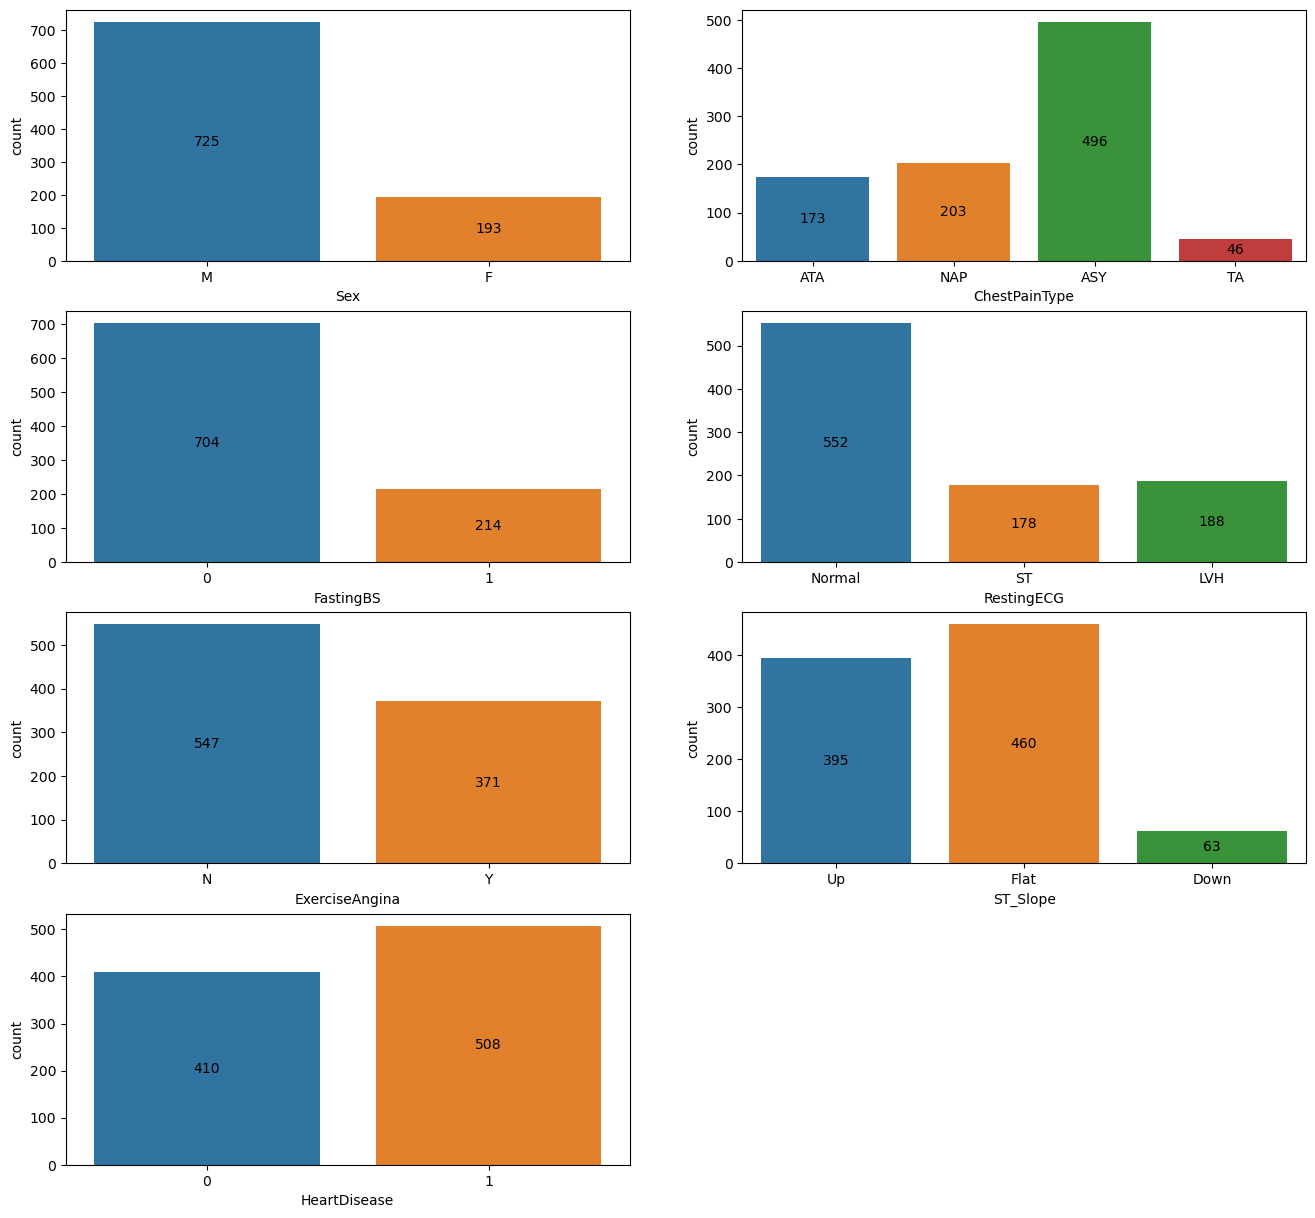

In [7]:
categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=hdp[col], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")



## Observations

Sex: The plot shows a disproportionate ratio of males to females in the dataset.

ChestPainType: The plot displays the distribution of different types of chest pain. It can be observed that the least common type is "Typical Angina" (TA) while ASY is the most comment.

FastingBS: The plot represents the distribution of fasting blood sugar levels; the majority of patients have fasting blood sugar levels below 120 mg/dl.

RestingECG: The plot shows the distribution of resting electrocardiogram results. Most people are 'Normnal'

ExerciseAngina: The plot displays the distribution of exercise-induced angina. It seems that the majority of patients do not experience exercise-induced angina.

ST_Slope: The plot represents the distribution of the slope of the peak exercise ST segment. The most common slope is "Flat".

HeartDisease: The plot shows the distribution of the output class, indicating the presence or absence of heart disease. The dataset contains more instances of patients without heart disease (class 0) compared to those with heart disease (class 1).


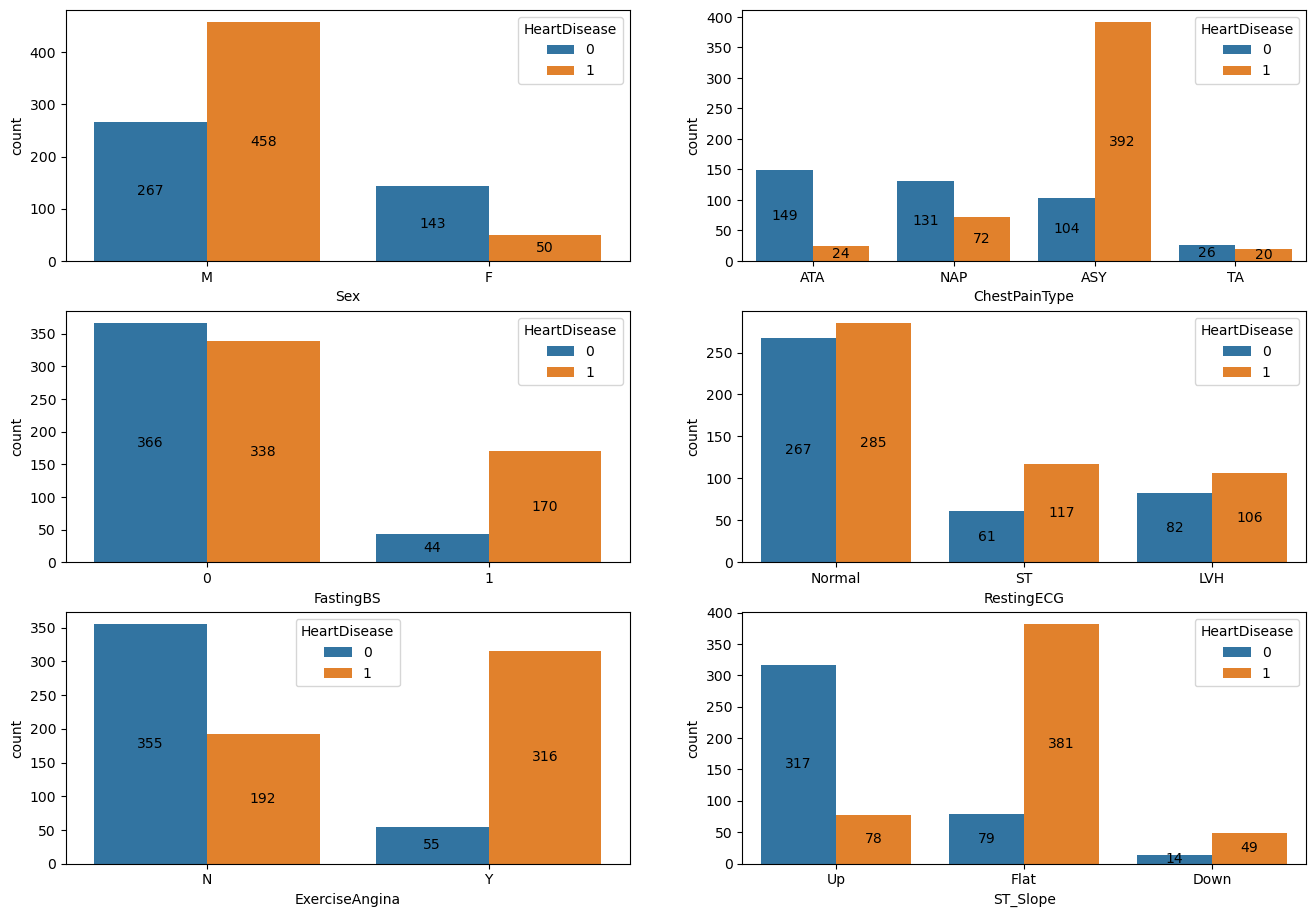

In [8]:
#Grouping by Heartdisease

fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=hdp[col], hue=hdp["HeartDisease"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

## Observations

- Higher percentage of male have heartdisease compared to women
- 392 paruent diagnosed with heart disease have ASY chest pain
- High proportion (170 patients) with blood sugar greater than 120mg/dl have been diagnosed with heart disease
- High proportion (316 patients) who had exercised-induced angina, have been diagnosed with heart disease
- High proportion (381 patients) who have a flat SLT slope, were diagnosed with heart disease


## Date Clearning

- There are no missing values
- Dataset is skewed towards male patients 725:193 male to female ratio which can impact predictions for female patients
- 392 patients diagnosed with heart disease have asymptomatic ches pain ASY; those with heart-disease did not have chest pain as a symptom
- signification number (190) of patients with blood sugar greater than 120mg / dl were diagnosed with heart disease 

In [16]:
#count number of rows that have 0 value for RestingBP 
hdp[hdp["RestingBP"] == 0].shape[0]



1

In [15]:
hdp[hdp["RestingBP"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [10]:
#count number of rows that have 0 value for Cholesterol
hdp[hdp["Cholesterol"] == 0].shape[0]

172

In [17]:
hdp[hdp["Cholesterol"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


We can remove the single value for RestingBP

For thr 172 zero values for Cholestoral, we will replcae them with a median value. We will use two medians for cholestoral; one for those diagnosed with heart disease and another for those not diagnosed with heart disease. 


In [42]:
hdp_clean = hdp.copy()

#only keep rows that have non-zero values for RestingBP 
hdp_clean = hdp_clean[hdp_clean["RestingBP"] != 0]

heartdisease_mask = hdp_clean["HeartDisease"]==0 #Create a mask for the heart disease column


Cholesterol_without_heartdisease = hdp_clean.loc[heartdisease_mask,"Cholesterol"] #Apply the mask to the Cholesterol column    
Cholesterol_with_heartdisease = hdp_clean.loc[~heartdisease_mask,"Cholesterol"] #Apply the mask to the Cholesterol column

hdp_clean.loc[heartdisease_mask, "Cholesterol"] = Cholesterol_without_heartdisease.replace(to_replace = 0, value = Cholesterol_without_heartdisease.median())
hdp_clean.loc[~heartdisease_mask, "Cholesterol"] = Cholesterol_with_heartdisease.replace(to_replace = 0, value = Cholesterol_with_heartdisease.median())

print(Cholesterol_without_heartdisease.median())
print(Cholesterol_with_heartdisease.median())

227.0
217.0


In [40]:
hdp_clean[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


As expected the min value for Cholesterol and Resting BP has changed and no longer zero. Also the median values for Cholesterol are different depending on if the patient has heart disease or not

## Feature Selection

We can focus on the following features:
- Age
- Sex
- ChestPainType
- Cholesterol
- FastingBS

We will identify how strongly the feature columns are correlated to the target colummn- to do this we will first convert our categorical columns into dummy variables

In [46]:
# Convert categorical features into dummy variables
hdp_clean = pd.get_dummies(hdp_clean, drop_first=True)
hdp_clean.head()


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_0,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,1,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,0,0,1,0,1,0,1,1,0
4,54,150,195,122,0.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1


Check for correlation:

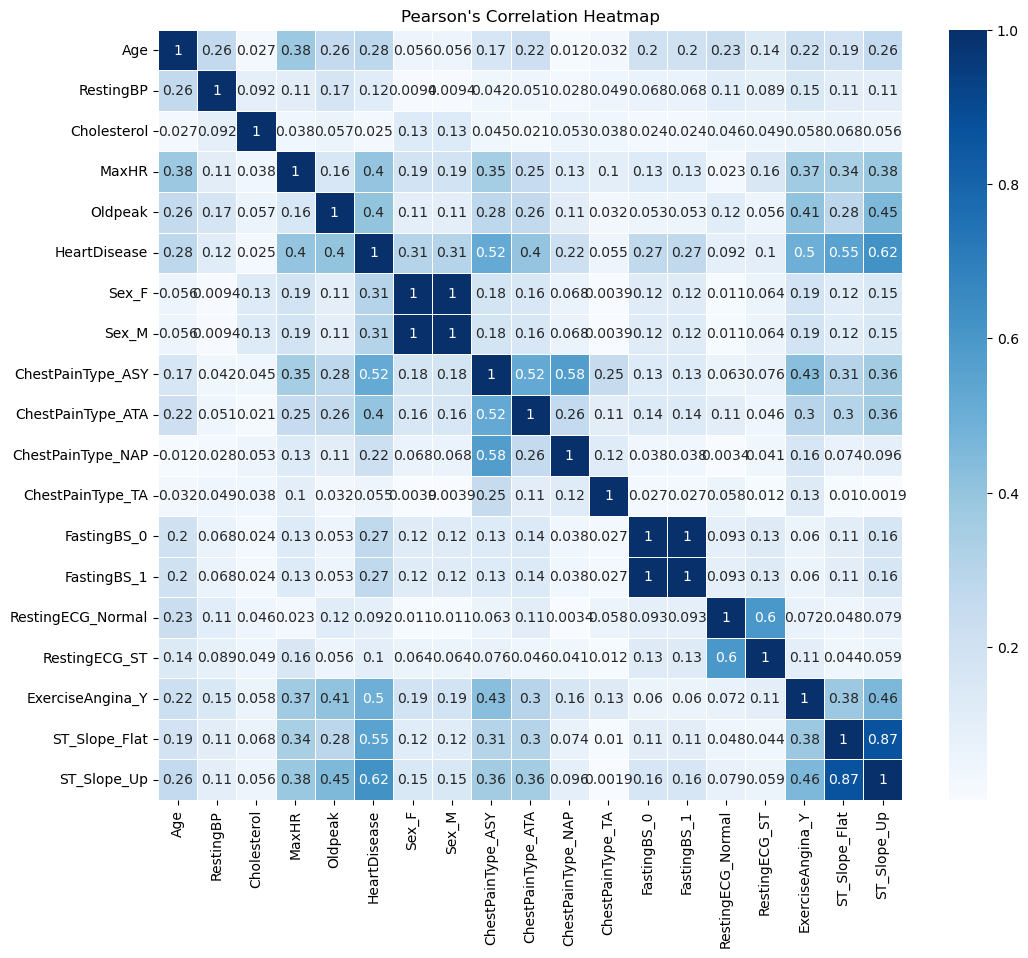

In [59]:
# Calculate the correlation matrix
corr_matrix = abs(hdp_clean.corr())

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title("Pearson's Correlation Heatmap")
plt.show()


<Axes: >

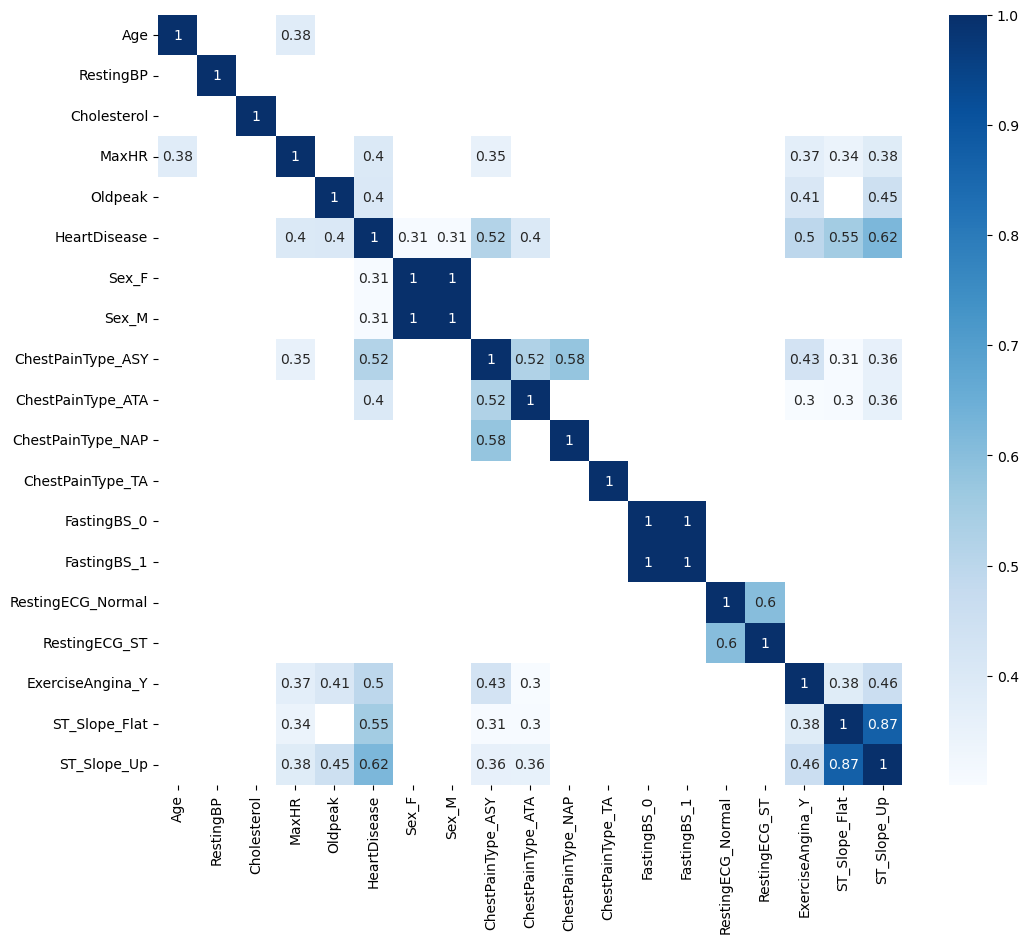

In [63]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix[corr_matrix > 0.3], annot=True, cmap="Blues")

We can see the following features strongly correlated - coeeficient is greater than 0.3 to Heart Disease:

- Oldpeak
- MaxHR
- ChestPainType_ATA
- ChestPainType_NAP
- ExerciseAngina_Y
- ST_Slope_Flat
- ST_Slope_Up

Interestesingly, cholestoral is not strongly correlated to heart disease

From what we have discovered so far, we can narrow down our features to the following:

- MaxHR 
- Oldpeak
- Sex_M (It has a relatively low value for the coefficient, but given what we observed in our EDA, we will take it into account) 
- ExerciseAngina_Y
- ST_Slope_Flat
- ST_Slope_Up
- ChestPainType_ASY

## Build a Classifier

In [68]:
#Split the dataset into training and validation sets and select a suitable split percentage

from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
train_data, val_data = train_test_split(hdp_clean, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print("Training set shape:", train_data.shape)
print("Validation set shape:", val_data.shape)


Training set shape: (733, 19)
Validation set shape: (184, 19)


In [67]:
selected_features = ['MaxHR', 'Oldpeak', 'Sex_M', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'ChestPainType_ASY']


In [69]:
from sklearn.neighbors import KNeighborsClassifier

# List of values for the number of neighbors
neighbors_list = [3, 5, 7, 9]

# Iterate over the list
for neighbors in neighbors_list:
    # Create a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=neighbors)
    
    # Train the classifier on the training data
    knn.fit(train_data[selected_features], train_data["HeartDisease"])
    
    # Evaluate the classifier on the validation data
    accuracy = knn.score(val_data[selected_features], val_data["HeartDisease"])
    
    # Print the accuracy for each iteration
    print(f"Accuracy for {neighbors} neighbors: {accuracy}")


Accuracy for 3 neighbors: 0.8206521739130435
Accuracy for 5 neighbors: 0.8152173913043478
Accuracy for 7 neighbors: 0.8043478260869565
Accuracy for 9 neighbors: 0.7989130434782609


In [74]:
#iterate over the selected features - we can create a k-NN classifier for each feature and evaluate its accuracy on the validation set

from sklearn.neighbors import KNeighborsClassifier

# Iterate over the selected features
for feature in selected_features:
    # Create a k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    
    # Train the classifier on the training data with the current feature
    knn.fit(train_data[[feature]], train_data["HeartDisease"])
    
    # Evaluate the classifier on the validation data with the current feature
    accuracy = knn.score(val_data[[feature]], val_data["HeartDisease"])
    
    # Print the accuracy for the current feature
    print(f"Accuracy for feature {feature}: {accuracy}")


Accuracy for feature MaxHR: 0.6684782608695652
Accuracy for feature Oldpeak: 0.6684782608695652
Accuracy for feature Sex_M: 0.6684782608695652
Accuracy for feature ExerciseAngina_Y: 0.6739130434782609
Accuracy for feature ST_Slope_Flat: 0.7608695652173914
Accuracy for feature ST_Slope_Up: 0.7880434782608695
Accuracy for feature ChestPainType_ASY: 0.75


The best performing feature with k=3 is ST_Slope_Up with an accuracy of  78.8%, with ST_Slope_Up in second place.
The same is also true for k=5

## Building a Classifier with Multiple Features

Lets attempt to train a model on all the features together. To do this, we should first scale out data for the selected features:

In [80]:
X_train = train_data[selected_features]
y_train = train_data["HeartDisease"]

X_val = val_data[selected_features]
y_val = val_data["HeartDisease"]



In [82]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[selected_features])
X_val_scaled = scaler.transform(X_val[selected_features])

In [83]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 82.07


Model's accuracy has moved up to 82.07% - not significant but we can explore hyperparameter optimisation to make the model optimal.

Begin by prepating out data..

In [96]:
X = hdp_clean.drop(["HeartDisease"], axis=1)
y = hdp_clean["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 417)

features = [
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])




In [97]:
grid_params = {"n_neighbors": range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': range(1, 20)},
             scoring='accuracy')

In [98]:
knn_grid.best_score_*100, knn_grid.best_params_

(83.43507030603806, {'metric': 'minkowski', 'n_neighbors': 19})

Our best model had an accuracy of ~83% with 19 n_neighbors and minkowski as the distance metric.

The accuracy of this model is only slightly better. Since GridSearchCV employs a cross-validation approach, it is reasonable to assume that this is a better estimate of how the model performs compared to our prior attempt.

## Model Evaluation on Test Set

In [103]:
#We need to first normalize our test set similar to how we scaled our training set.

X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 86.96


This suggests our model is likely to predict if tha patient is at risk 87% of the time. However, the accuracy being higher may be due to a number of factors such as gender ratio.

In [104]:
print("Distribution of patients by their sex in the entire dataset")
print(X.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(X_train.Sex_M.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(X_test.Sex_M.value_counts())


Distribution of patients by their sex in the entire dataset
1    724
0    193
Name: Sex_M, dtype: int64

Distribution of patients by their sex in the training dataset
1    615
0    164
Name: Sex_M, dtype: int64

Distribution of patients by their sex in the test dataset
1    109
0     29
Name: Sex_M, dtype: int64


In [105]:
# Calculate male:female ratio for the entire dataset
total_ratio = X.Sex_M.value_counts()[1] / X.Sex_M.value_counts()[0]

# Calculate male:female ratio for the training dataset
train_ratio = X_train.Sex_M.value_counts()[1] / X_train.Sex_M.value_counts()[0]

# Calculate male:female ratio for the test dataset
test_ratio = X_test.Sex_M.value_counts()[1] / X_test.Sex_M.value_counts()[0]

print("Male:Female ratio for the entire dataset:", total_ratio)
print("Male:Female ratio for the training dataset:", train_ratio)
print("Male:Female ratio for the test dataset:", test_ratio)


Male:Female ratio for the entire dataset: 3.7512953367875648
Male:Female ratio for the training dataset: 3.75
Male:Female ratio for the test dataset: 3.7586206896551726


The imbalance may have an impact on our model, as the model is trained on a dataset of mainly men

## Summary and Next Steps

Our final model was trained using the following features:

- Oldpeak
- Sex_M
- ExerciseAngina_Y
- ST_Slope_Flat
- ST_Slope_Up

and had a test set accuracy of 86.96%. There are a few things we can try to get better results:

1. Explore what would happen if gender wasnt a feature to train on
2. What would happen on a different data set with more geneder balance or only men or women
3. Try different features
4. Explore other algorithms that might perform better than k-NN.
